In [38]:
# optical flow visualize
# MunsellColor System

# ref:https://blog.csdn.net/zouxy09/article/details/8683859

import numpy as np
UNKNOWN_FLOW_THRESH=1e9
def make_color_wheel():
    color_wheel_list = []
    RY, YG, GC, CB, BM, MR = 15, 6, 4, 11, 13, 6
    for i in range(RY):
        color_wheel_list.append([255, 255 * i / RY, 0])
    for i in range(YG):
        color_wheel_list.append([255 - 255 * i / YG, 255, 0])
    for i in range(GC):
        color_wheel_list.append([0, 255, 255 * i / GC])
    for i in range(CB):
        color_wheel_list.append([0, 255 - 255 * i / CB, 255])
    for i in range(BM):
        color_wheel_list.append([255 * i / BM, 0, 255])
    for i in range(MR):
        color_wheel_list.append([255, 0, 255 - 255 * i / MR])

    return color_wheel_list

def motion_to_color(flow,color_wheel_list=make_color_wheel()):
    flow_rows, flow_cols, DIM = flow.shape
    if DIM!=2:
        return False
    color=np.zeros((flow_rows,flow_cols,3))
    maxrad=-1
    
    for i in range(flow_rows):
        for j in range(flow_cols):
            fx=flow[i][j][0]
            fy=flow[i][j][1]

            if abs(fx)>UNKNOWN_FLOW_THRESH or abs(fy)>UNKNOWN_FLOW_THRESH:
                pass
            rad=np.sqrt(fx*fx+fy*fy)
            if rad > maxrad:
                maxrad=rad
                
    for i in range(flow_rows):
        for j in range(flow_cols):
            color[i,j]=0
            fx = flow[i][j][0]/maxrad
            fy = flow[i][j][1]/maxrad
            if abs(fx) > UNKNOWN_FLOW_THRESH or abs(fy) > UNKNOWN_FLOW_THRESH:
                color[i, j]=[0,0,0]
            rad = np.sqrt(fx * fx + fy * fy)

            angle = np.arctan2(-fy, -fx) / np.pi

            fk = (angle + 1.0) / 2.0 * (len(color_wheel_list) - 1)
            k0=int(fk)
            k1=(k0+1)%len(color_wheel_list)

            f=fk-k0

            for b in range(3):
                col0=color_wheel_list[k0][b]/255
                col1=color_wheel_list[k1][b]/255
                col=(1-f)*col0+f*col1
                if rad<=1:
                    col=1-rad*(1-col) # increase saturation with radius
                else:
                    col*=0.75  # out of range

                color[i][j][2-b]=int(255*col)
    return color

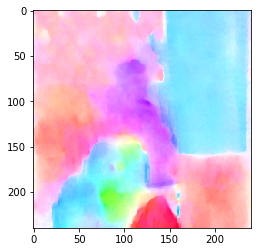

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as scio
flow=scio.loadmat('result/result.mat')
img=motion_to_color(flow['flow'])


#cv2.imwrite('hh.jpg',img)

b,g,r = cv2.split(img/255)
img2 = cv2.merge([r,g,b])
plt.imshow(img2)